<a href="https://colab.research.google.com/github/Doubles2/All_of_DoubleS2/blob/master/Keras/chap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> 케라스 이야기 </b>



케라스 주요 특징 
- 모듈화
- 최소주의
- 쉬운 확장성
- 파이썬 기반

기본 개념
1. 데이터셋 생성하기
2. 모델 구성하기
3. 모델 학습과정 설정하기 : compile()
4. 모델 학습시키기 : fit()
5. 학습과정 살펴보기
6. 모델 평가하기 : evaluate()
7. 모델 사용하기 : predict()

In [0]:
# mnist 예제
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units = 64,
                input_dim = 28*28,
                activation = 'relu'))

model.add(Dense(units = 10,
                activation = 'softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [0]:
# 4. 모델 학습시키기
hist = model.fit(x_train,
                 y_train,
                 epochs = 5,
                 batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 3s 54us/step - loss: 0.6663 - acc: 0.8307
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3456 - acc: 0.9037
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2965 - acc: 0.9172
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2670 - acc: 0.9256
Epoch 5/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2448 - acc: 0.9317


In [0]:
# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[0.6662520805120468, 0.34564231058359146, 0.296501651374499, 0.2669753548502922, 0.24482289696733156]
[0.83065, 0.90375, 0.9172166666666667, 0.9256, 0.9316666666666666]


In [0]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test,
                                  y_test,
                                  batch_size = 32)
print("## training loss and acc ##")
print(loss_and_metrics)

10000/10000 [==============================] - 0s 20us/step
## training loss and acc ##
[0.22912228623330594, 0.9362]


In [0]:
# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[4.0200273e-05 1.6480286e-08 1.7042650e-04 2.4121464e-03 5.4504579e-07
  4.7159479e-05 6.5922805e-09 9.9702662e-01 1.3219652e-05 2.8957034e-04]]


In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#matplotlib inline

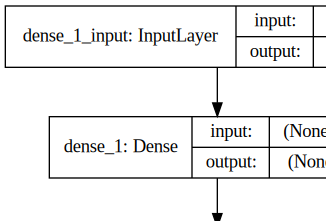

In [0]:
SVG(model_to_dot(model,
                 show_shapes = True).create(prog = 'dot',
                                            format = 'svg'))

In [0]:
# 모델 저장
from keras.models import load_model
model.save('mnist_mlp_model.h5')